In [241]:
odor_space = ['acidic', '', 'chemical', 'tropical', 'anisic', 'earthy', 'pine', 'vanilla', 'malty', 'coffee', 'coumarinic', 'fungal', 'fermented', 'dusty', 'brown', 'amber', 'citrus', 'chocolate', 'cocoa', 'soapy', 'ethereal', 'camphoreous', 'fishy', 'balsamic', 'tarragon', 'peach', 'medicinal', 'cooling', 'potato', 'nutty', 'tobacco', 'melon', 'eggy', 'bitter', 'oily', 'cherry', 'berry', 'tomato', 'sweet', 'meaty', 'clean', 'aromatic', 'medicinal,', 'No odor group found for these', 'musty', 'celery', 'juicy', 'pungent', 'mushroom', 'cheesy', 'sulfurous', 'herbal', 'fusel', 'licorice', 'jammy', 'bready', 'mustard', 'rummy', 'alcoholic', 'corn chip', 'tonka', 'buttery', 'orris', 'waxy', 'estery', 'vegetable', 'woody', 'caramellic', 'dairy', 'leathery', 'toasted', 'moldy', 'cabbage', 'fatty', 'garlic', 'winey', 'sour', 'animal', 'musk', 'lactonic', 'mentholic', 'floral', 'burnt', 'coconut', 'green', 'creamy', 'mossy', 'alliaceous', 'smoky', 'rooty', 'solvent', 'phenolic', 'fresh', 'spicy', 'marine', 'corn', 'fruity', 'thujonic', 'aldehydic', 'roasted', 'anise', 'minty', 'onion', 'honey', 'powdery']


In [242]:
len(odor_space)

105

In [243]:
used_odor_space = ['animal', 'berry', 'caramellic', 'citrus', 'earthy', 'ethereal', 'fatty', 'fermented', 'floral', 'fruity', 'green', 'herbal', 'sulfurous', 'tropical', 'vanilla', 'waxy', 'honey', 'aldehydic', 'amber', 'balsamic', 'creamy', 'musk', 'spicy', 'woody', 'minty', 'buttery', 'musty', 'soapy', 'camphoreous', 'alliaceous', 'cooling', 'nutty', 'coffee']
len(used_odor_space)

33

In [2]:
import json

path = "./train.json"
# path = "./test.json"

with open(path, "r") as j:
    train_data = json.load(j)

In [245]:
len(train_data)

115875

In [246]:
import pandas as pd

In [247]:
df = pd.DataFrame(train_data)

In [248]:
df.head()

,mol1,mol1_notes,mol2,mol2_notes,blend_notes
0,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C/C(=C/CC[C@@]1([C@H]2CC[C@H](C2)C1=C)C)/COC(=...,"[acidic, berry, nutty, orris, powdery, green, ...",[woody]
1,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=CC=C(C=C1)C(=O)C(O)O,"[fatty, nutty, powdery, green, earthy, vegetable]",[green]
2,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=CC=C(C=C1)C=O,"[cherry, almond, fruity, nutty, sharp, powdery...",[fruity]
3,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=COC(=C1)COCC2=CC=CO2,"[coffee, earthy, nutty]",[coffee]
4,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=COC(=C1)CS,"[coffee roasted coffee, fatty, sulfurous, oily...",[coffee]


In [249]:
blend_set = set()

def get_blend_note(list_notes):
    blend_set.update(list_notes)

In [250]:
df['blend_notes'].apply(lambda x: get_blend_note(x))

0         None
1         None
2         None
3         None
4         None
          ... 
115870    None
115871    None
115872    None
115873    None
115874    None
Name: blend_notes, Length: 115875, dtype: object

In [251]:
len(blend_set)

103

In [252]:
blend_set

{'',
 'No odor group found for these',
 'acidic',
 'alcoholic',
 'aldehydic',
 'alliaceous',
 'amber',
 'animal',
 'anise',
 'anisic',
 'aromatic',
 'balsamic',
 'berry',
 'bitter',
 'bready',
 'brown',
 'burnt',
 'buttery',
 'cabbage',
 'camphoreous',
 'caramellic',
 'celery',
 'cheesy',
 'chemical',
 'cherry',
 'chocolate',
 'citrus',
 'clean',
 'cocoa',
 'coconut',
 'coffee',
 'cooling',
 'corn',
 'corn chip',
 'coumarinic',
 'creamy',
 'dairy',
 'dusty',
 'earthy',
 'eggy',
 'estery',
 'ethereal',
 'fatty',
 'fermented',
 'fishy',
 'floral',
 'fresh',
 'fruity',
 'fungal',
 'fusel',
 'garlic',
 'green',
 'herbal',
 'honey',
 'jammy',
 'juicy',
 'lactonic',
 'leathery',
 'licorice',
 'marine',
 'meaty',
 'medicinal',
 'melon',
 'mentholic',
 'minty',
 'moldy',
 'mossy',
 'mushroom',
 'musk',
 'mustard',
 'musty',
 'nutty',
 'oily',
 'onion',
 'orris',
 'peach',
 'phenolic',
 'pine',
 'potato',
 'powdery',
 'pungent',
 'roasted',
 'rooty',
 'rummy',
 'smoky',
 'soapy',
 'solvent',
 '

In [253]:
def canonize(notes):
    canon = {"":None,"No odor group found for these":None,
    "anisic":"anise","corn chip":"corn",
    "medicinal,":"medicinal"}

    cleaned = set()
    for n in notes:
        # Valid note
        if not n in canon:
            cleaned.add(n)
        # Should be removed
        elif not canon[n]:
            continue
        else:
            cleaned.add(canon[n])
    return cleaned

In [254]:
required_odors = set(used_odor_space)
def update_blend_notes(list_notes):
    blend_set = set()
    blend_set.update(list_notes)
    cleaned = canonize(blend_set)
    req_set = cleaned.intersection(required_odors)
    return list(sorted(req_set))

In [255]:
# test
update_blend_notes(['random', 'animal', '', 'berry', 'anisic'])

['animal', 'berry']

In [256]:
df['cleaned_blend_notes'] = df['blend_notes'].apply(lambda x: update_blend_notes(x))

In [257]:
df.head()

,mol1,mol1_notes,mol2,mol2_notes,blend_notes,cleaned_blend_notes
0,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C/C(=C/CC[C@@]1([C@H]2CC[C@H](C2)C1=C)C)/COC(=...,"[acidic, berry, nutty, orris, powdery, green, ...",[woody],[woody]
1,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=CC=C(C=C1)C(=O)C(O)O,"[fatty, nutty, powdery, green, earthy, vegetable]",[green],[green]
2,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=CC=C(C=C1)C=O,"[cherry, almond, fruity, nutty, sharp, powdery...",[fruity],[fruity]
3,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=COC(=C1)COCC2=CC=CO2,"[coffee, earthy, nutty]",[coffee],[coffee]
4,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=COC(=C1)CS,"[coffee roasted coffee, fatty, sulfurous, oily...",[coffee],[coffee]


In [258]:
df['cleaned_blend_notes'].apply(lambda x: get_blend_note(x))
len(blend_set)

103

In [259]:
len(df)

115875

In [260]:
from rdkit import Chem

def canonical_smiles(smiles):
    return Chem.MolToSmiles(Chem.MolFromSmiles(smiles), isomericSmiles = True)

def remove_stereo(smiles):
    smiles = smiles.replace('@','')
    smiles = smiles.replace('/','')
    smiles = smiles.replace('\\','')
    return canonical_smiles(smiles)


def join_smiles(smi_1, smi_2, _remove_stereo = False):
    if _remove_stereo:
        mol_1 = Chem.MolFromSmiles(remove_stereo(smi_1))
        mol_2 = Chem.MolFromSmiles(remove_stereo(smi_2))
    else:
        mol_1 = Chem.MolFromSmiles(smi_1)
        mol_2 = Chem.MolFromSmiles(smi_2)
    combo = Chem.CombineMols(mol_1,mol_2)
    comb_smi = Chem.MolToSmiles(combo)
    return comb_smi

In [261]:
# test remove_stereo
print(remove_stereo('CC/C=C\CC(C)OC(=O)@C'))
print(remove_stereo('CCC/C=C(\C)/C(=O)O'))
print(remove_stereo(join_smiles('C(/C(=C\C(=O)O)/C(=O)O)C(=O)O', 'C1=CC=C(C=C1)C=O')))

CCC=CCC(C)OC(C)=O
CCCC=C(C)C(=O)O
O=C(O)C=C(CC(=O)O)C(=O)O.O=Cc1ccccc1


In [262]:
# test
print(join_smiles('C(/C(=C\C(=O)O)/C(=O)O)C(=O)O', 'C1=CC=C(C=C1)C=O'))
print(join_smiles('C(/C(=C\C(=O)O)/C(=O)O)C(=O)O', 'C1=CC=C(C=C1)C=O', _remove_stereo=True))


O=C(O)/C=C(\CC(=O)O)C(=O)O.O=Cc1ccccc1
O=C(O)C=C(CC(=O)O)C(=O)O.O=Cc1ccccc1


In [263]:
# test_feat_on_combined_smiles

from openpom.feat.graph_featurizer import GraphFeaturizer

feat = GraphFeaturizer()
graph = feat(join_smiles('C(/C(=C\C(=O)O)/C(=O)O)C(=O)O', 'C1=CC=C(C=C1)C=O'))[0]

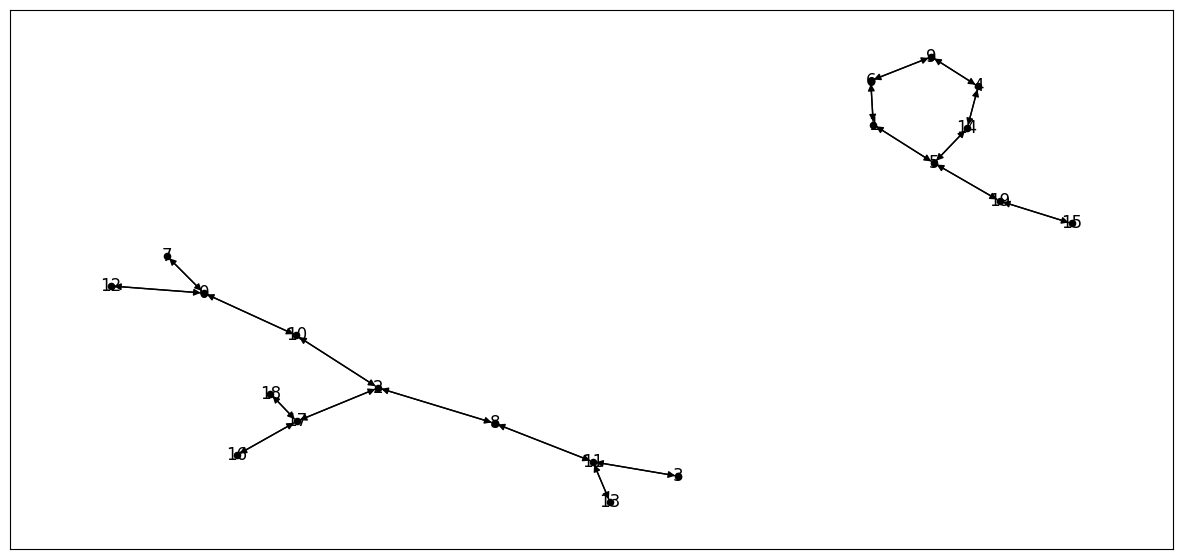

In [264]:
import dgl.data
import matplotlib.pyplot as plt
import networkx as nx

g = graph.to_dgl_graph()
options = {
    'node_color': 'black',
    'node_size': 20,
    'width': 1,
}
G = dgl.to_networkx(g)
plt.figure(figsize=[15,7])
nx.draw_networkx(G, **options)

In [265]:
df['combined_smiles'] = df.apply(lambda x: join_smiles(x.mol1, x.mol2), axis=1)
df['combined_smiles_non_stereo'] = df.apply(lambda x: join_smiles(x.mol1, x.mol2, _remove_stereo=True), axis=1)

In [266]:
len(df)

115875

In [267]:
df.head()

,mol1,mol1_notes,mol2,mol2_notes,blend_notes,cleaned_blend_notes,combined_smiles,combined_smiles_non_stereo
0,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C/C(=C/CC[C@@]1([C@H]2CC[C@H](C2)C1=C)C)/COC(=...,"[acidic, berry, nutty, orris, powdery, green, ...",[woody],[woody],C=C1[C@@H]2CC[C@@H](C2)[C@@]1(C)CC/C=C(/C)COC(...,C=C1C2CCC(C2)C1(C)CCC=C(C)COC(C)=O.CC(=O)OCC(C...
1,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=CC=C(C=C1)C(=O)C(O)O,"[fatty, nutty, powdery, green, earthy, vegetable]",[green],[green],O=C(O)/C=C(\CC(=O)O)C(=O)O.O=C(c1ccccc1)C(O)O,O=C(O)C=C(CC(=O)O)C(=O)O.O=C(c1ccccc1)C(O)O
2,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=CC=C(C=C1)C=O,"[cherry, almond, fruity, nutty, sharp, powdery...",[fruity],[fruity],O=C(O)/C=C(\CC(=O)O)C(=O)O.O=Cc1ccccc1,O=C(O)C=C(CC(=O)O)C(=O)O.O=Cc1ccccc1
3,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=COC(=C1)COCC2=CC=CO2,"[coffee, earthy, nutty]",[coffee],[coffee],O=C(O)/C=C(\CC(=O)O)C(=O)O.c1coc(COCc2ccco2)c1,O=C(O)C=C(CC(=O)O)C(=O)O.c1coc(COCc2ccco2)c1
4,C(/C(=C\C(=O)O)/C(=O)O)C(=O)O,"[nutty, dry, vegetable, musty, toasted]",C1=COC(=C1)CS,"[coffee roasted coffee, fatty, sulfurous, oily...",[coffee],[coffee],O=C(O)/C=C(\CC(=O)O)C(=O)O.SCc1ccco1,O=C(O)C=C(CC(=O)O)C(=O)O.SCc1ccco1


In [268]:
len(df[df.duplicated('combined_smiles_non_stereo', keep=False)])

15360

In [269]:
new_df = df[['cleaned_blend_notes', 'combined_smiles', 'combined_smiles_non_stereo']]

In [270]:
new_df['cleaned_blend_notes_string'] = new_df['cleaned_blend_notes'].apply(lambda x: ";".join(x))

/tmp/ipykernel_222317/4155373501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_blend_notes_string'] = new_df['cleaned_blend_notes'].apply(lambda x: ";".join(x))


In [271]:
new_df.head()

,cleaned_blend_notes,combined_smiles,combined_smiles_non_stereo,cleaned_blend_notes_string
0,[woody],C=C1[C@@H]2CC[C@@H](C2)[C@@]1(C)CC/C=C(/C)COC(...,C=C1C2CCC(C2)C1(C)CCC=C(C)COC(C)=O.CC(=O)OCC(C...,woody
1,[green],O=C(O)/C=C(\CC(=O)O)C(=O)O.O=C(c1ccccc1)C(O)O,O=C(O)C=C(CC(=O)O)C(=O)O.O=C(c1ccccc1)C(O)O,green
2,[fruity],O=C(O)/C=C(\CC(=O)O)C(=O)O.O=Cc1ccccc1,O=C(O)C=C(CC(=O)O)C(=O)O.O=Cc1ccccc1,fruity
3,[coffee],O=C(O)/C=C(\CC(=O)O)C(=O)O.c1coc(COCc2ccco2)c1,O=C(O)C=C(CC(=O)O)C(=O)O.c1coc(COCc2ccco2)c1,coffee
4,[coffee],O=C(O)/C=C(\CC(=O)O)C(=O)O.SCc1ccco1,O=C(O)C=C(CC(=O)O)C(=O)O.SCc1ccco1,coffee


In [272]:
odor_dummies = new_df['cleaned_blend_notes_string'].str.get_dummies(sep=';')
encoded_df = pd.concat([new_df, odor_dummies], axis=1)

In [273]:
encoded_df.columns

Index(['cleaned_blend_notes', 'combined_smiles', 'combined_smiles_non_stereo',
       'cleaned_blend_notes_string', 'aldehydic', 'alliaceous', 'amber',
       'animal', 'balsamic', 'berry', 'buttery', 'camphoreous', 'caramellic',
       'citrus', 'coffee', 'cooling', 'creamy', 'earthy', 'ethereal', 'fatty',
       'fermented', 'floral', 'fruity', 'green', 'herbal', 'honey', 'minty',
       'musk', 'musty', 'nutty', 'soapy', 'spicy', 'sulfurous', 'tropical',
       'vanilla', 'waxy', 'woody'],
      dtype='object')

In [274]:
encoded_df.head()

,cleaned_blend_notes,combined_smiles,combined_smiles_non_stereo,cleaned_blend_notes_string,aldehydic,alliaceous,amber,animal,balsamic,berry,...,musk,musty,nutty,soapy,spicy,sulfurous,tropical,vanilla,waxy,woody
0,[woody],C=C1[C@@H]2CC[C@@H](C2)[C@@]1(C)CC/C=C(/C)COC(...,C=C1C2CCC(C2)C1(C)CCC=C(C)COC(C)=O.CC(=O)OCC(C...,woody,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,[green],O=C(O)/C=C(\CC(=O)O)C(=O)O.O=C(c1ccccc1)C(O)O,O=C(O)C=C(CC(=O)O)C(=O)O.O=C(c1ccccc1)C(O)O,green,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[fruity],O=C(O)/C=C(\CC(=O)O)C(=O)O.O=Cc1ccccc1,O=C(O)C=C(CC(=O)O)C(=O)O.O=Cc1ccccc1,fruity,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[coffee],O=C(O)/C=C(\CC(=O)O)C(=O)O.c1coc(COCc2ccco2)c1,O=C(O)C=C(CC(=O)O)C(=O)O.c1coc(COCc2ccco2)c1,coffee,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[coffee],O=C(O)/C=C(\CC(=O)O)C(=O)O.SCc1ccco1,O=C(O)C=C(CC(=O)O)C(=O)O.SCc1ccco1,coffee,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
dup = encoded_df[['combined_smiles_non_stereo', 'cleaned_blend_notes_string']][encoded_df['combined_smiles_non_stereo'].duplicated(keep=False)]
index_set = set()
index_set.update(dup['combined_smiles_non_stereo'].to_list())
list_idx_of_duplicates = []
for i in index_set:
    # print(list(dup[dup['CID'] == i].index))
    list_idx_of_duplicates.append(list(dup[dup['combined_smiles_non_stereo'] == i].index))

In [276]:
encoded_df['cleaned_blend_notes_string_old'] = encoded_df.loc[:, 'cleaned_blend_notes_string']
encoded_df.head()

,cleaned_blend_notes,combined_smiles,combined_smiles_non_stereo,cleaned_blend_notes_string,aldehydic,alliaceous,amber,animal,balsamic,berry,...,musty,nutty,soapy,spicy,sulfurous,tropical,vanilla,waxy,woody,cleaned_blend_notes_string_old
0,[woody],C=C1[C@@H]2CC[C@@H](C2)[C@@]1(C)CC/C=C(/C)COC(...,C=C1C2CCC(C2)C1(C)CCC=C(C)COC(C)=O.CC(=O)OCC(C...,woody,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,woody
1,[green],O=C(O)/C=C(\CC(=O)O)C(=O)O.O=C(c1ccccc1)C(O)O,O=C(O)C=C(CC(=O)O)C(=O)O.O=C(c1ccccc1)C(O)O,green,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,green
2,[fruity],O=C(O)/C=C(\CC(=O)O)C(=O)O.O=Cc1ccccc1,O=C(O)C=C(CC(=O)O)C(=O)O.O=Cc1ccccc1,fruity,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fruity
3,[coffee],O=C(O)/C=C(\CC(=O)O)C(=O)O.c1coc(COCc2ccco2)c1,O=C(O)C=C(CC(=O)O)C(=O)O.c1coc(COCc2ccco2)c1,coffee,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,coffee
4,[coffee],O=C(O)/C=C(\CC(=O)O)C(=O)O.SCc1ccco1,O=C(O)C=C(CC(=O)O)C(=O)O.SCc1ccco1,coffee,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,coffee


In [277]:
for dup_set in list_idx_of_duplicates:
    desc_set = set()
    desc_set.update(encoded_df['cleaned_blend_notes_string'][dup_set].to_list())
    new_desc_string = ';'.join(desc_set)
    encoded_df['cleaned_blend_notes_string'][dup_set] = new_desc_string

encoded_df_cleaned = encoded_df.drop_duplicates('combined_smiles_non_stereo', keep='first').reset_index(drop=True)

/tmp/ipykernel_222317/1752288051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df['cleaned_blend_notes_string'][dup_set] = new_desc_string
/tmp/ipykernel_222317/1752288051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df['cleaned_blend_notes_string'][dup_set] = new_desc_string
/tmp/ipykernel_222317/1752288051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df['cleaned_blend_notes_string'][dup_set

In [278]:
encoded_df_cleaned[encoded_df_cleaned['combined_smiles_non_stereo'].duplicated(keep=False)]

,cleaned_blend_notes,combined_smiles,combined_smiles_non_stereo,cleaned_blend_notes_string,aldehydic,alliaceous,amber,animal,balsamic,berry,...,musty,nutty,soapy,spicy,sulfurous,tropical,vanilla,waxy,woody,cleaned_blend_notes_string_old


In [279]:
encoded_df_cleaned_v2 = encoded_df_cleaned[['combined_smiles_non_stereo', 'cleaned_blend_notes_string']]
encoded_df_cleaned_v2.head()

,combined_smiles_non_stereo,cleaned_blend_notes_string
0,C=C1C2CCC(C2)C1(C)CCC=C(C)COC(C)=O.CC(=O)OCC(C...,woody
1,O=C(O)C=C(CC(=O)O)C(=O)O.O=C(c1ccccc1)C(O)O,green
2,O=C(O)C=C(CC(=O)O)C(=O)O.O=Cc1ccccc1,fruity
3,O=C(O)C=C(CC(=O)O)C(=O)O.c1coc(COCc2ccco2)c1,coffee
4,O=C(O)C=C(CC(=O)O)C(=O)O.SCc1ccco1,coffee


In [280]:
encoded_df_cleaned_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107819 entries, 0 to 107818
Data columns (total 2 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   combined_smiles_non_stereo  107819 non-null  object
 1   cleaned_blend_notes_string  107819 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [281]:
odor_dummies = encoded_df_cleaned_v2['cleaned_blend_notes_string'].str.get_dummies(sep=';')
encoded_df_cleaned_v3 = pd.concat([encoded_df_cleaned_v2, odor_dummies], axis=1)

In [282]:
encoded_df_cleaned_v3.columns

Index(['combined_smiles_non_stereo', 'cleaned_blend_notes_string', 'aldehydic',
       'alliaceous', 'amber', 'animal', 'balsamic', 'berry', 'buttery',
       'camphoreous', 'caramellic', 'citrus', 'coffee', 'cooling', 'creamy',
       'earthy', 'ethereal', 'fatty', 'fermented', 'floral', 'fruity', 'green',
       'herbal', 'honey', 'minty', 'musk', 'musty', 'nutty', 'soapy', 'spicy',
       'sulfurous', 'tropical', 'vanilla', 'waxy', 'woody'],
      dtype='object')

In [283]:
len(encoded_df_cleaned_v3)

107819

In [284]:
encoded_combined = encoded_df_cleaned_v3.drop(columns=['combined_smiles_non_stereo', 'cleaned_blend_notes_string'])
odors_df = pd.DataFrame(encoded_combined.sum().sort_values(ascending=False), columns=['sum'])
odors_df.query('sum>0')

,sum
fruity,35589
floral,32022
green,20620
waxy,8391
woody,5959
herbal,5654
balsamic,5224
citrus,3791
spicy,3681
fatty,3011


In [285]:
encoded_df_cleaned_v3.to_csv("cleaned_non_stereo_train.csv", index=False)
# encoded_df_cleaned_v3.to_csv("cleaned_non_stereo_test.csv", index=False)

In [286]:
encoded_df.to_csv("cleaned_train.csv", index=False)
encoded_df.to_csv("cleaned_test.csv", index=False)